1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import datetime


In [ ]:
data=pd.read_csv("/content/TSLA (1).CSV")

In [ ]:
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
757,2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [ ]:
#univarite timeseries
stock_data=data[["Date","Close"]]

In [ ]:
stock_data.head(7)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
5,2019-05-29,37.972000
6,2019-05-30,37.644001


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

<ipython-input-9-ca44d834234d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data["Date"])


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [ ]:
stock_data.head(2)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001


In [ ]:
stock_data=stock_data.set_index("Date")

In [ ]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [ ]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


# EDA(exploratory data analysis)

In [ ]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


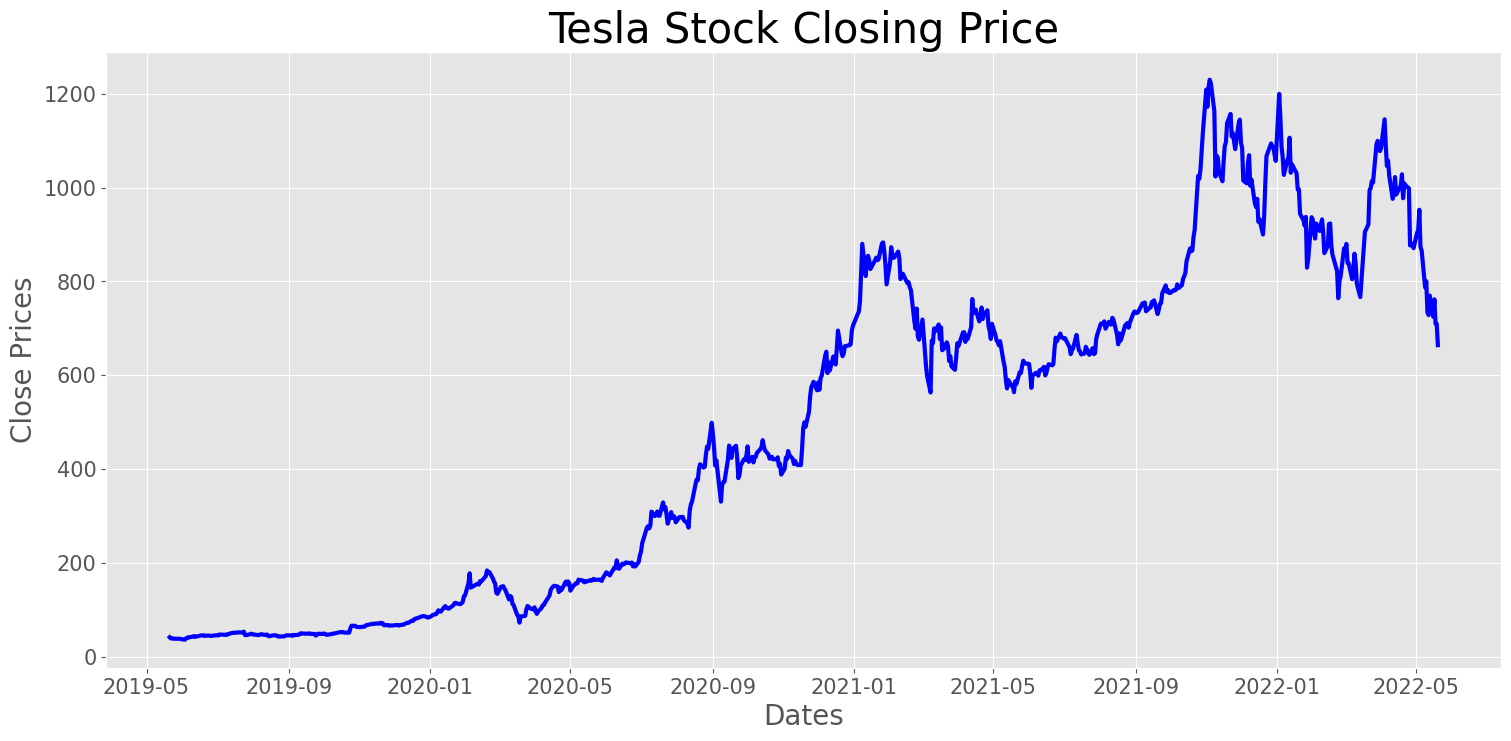

In [ ]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

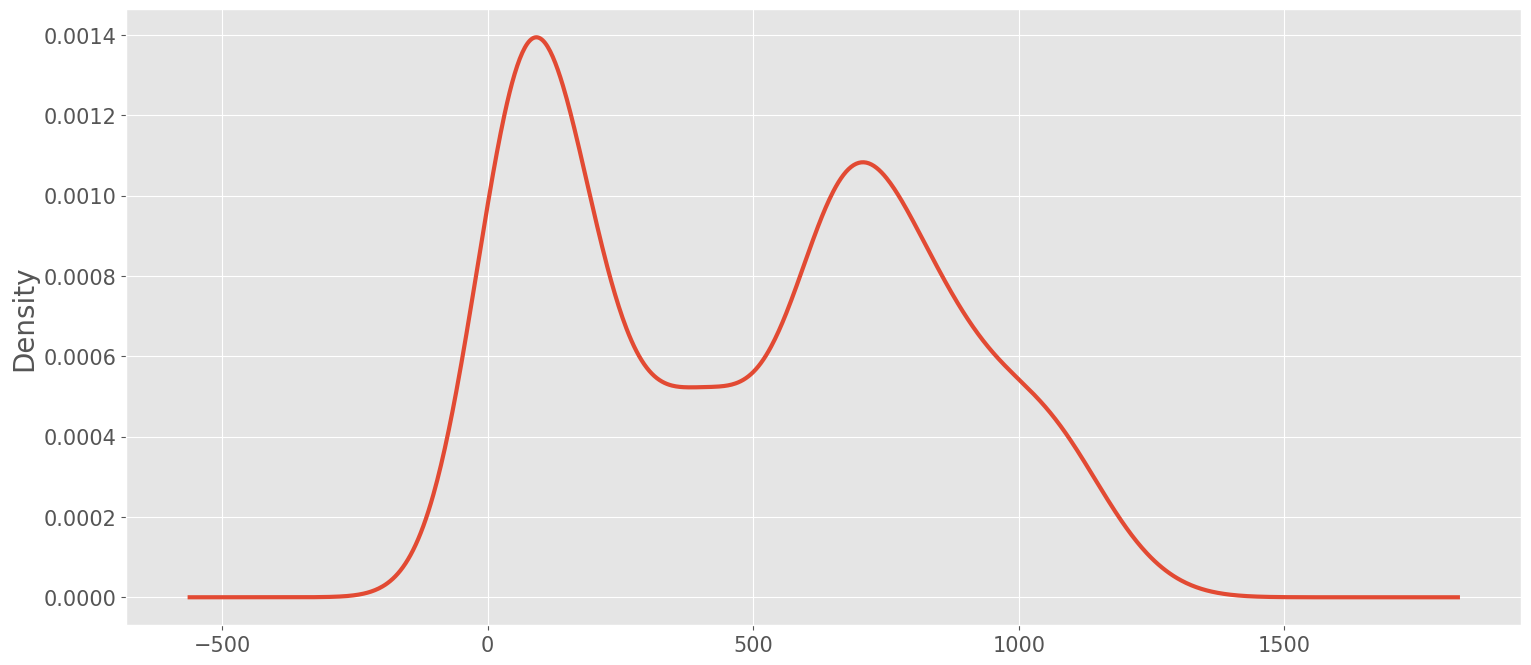

In [ ]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
rolmean=stock_data["Close"].rolling(48).mean()

In [ ]:
rolstd=stock_data["Close"].rolling(48).std()

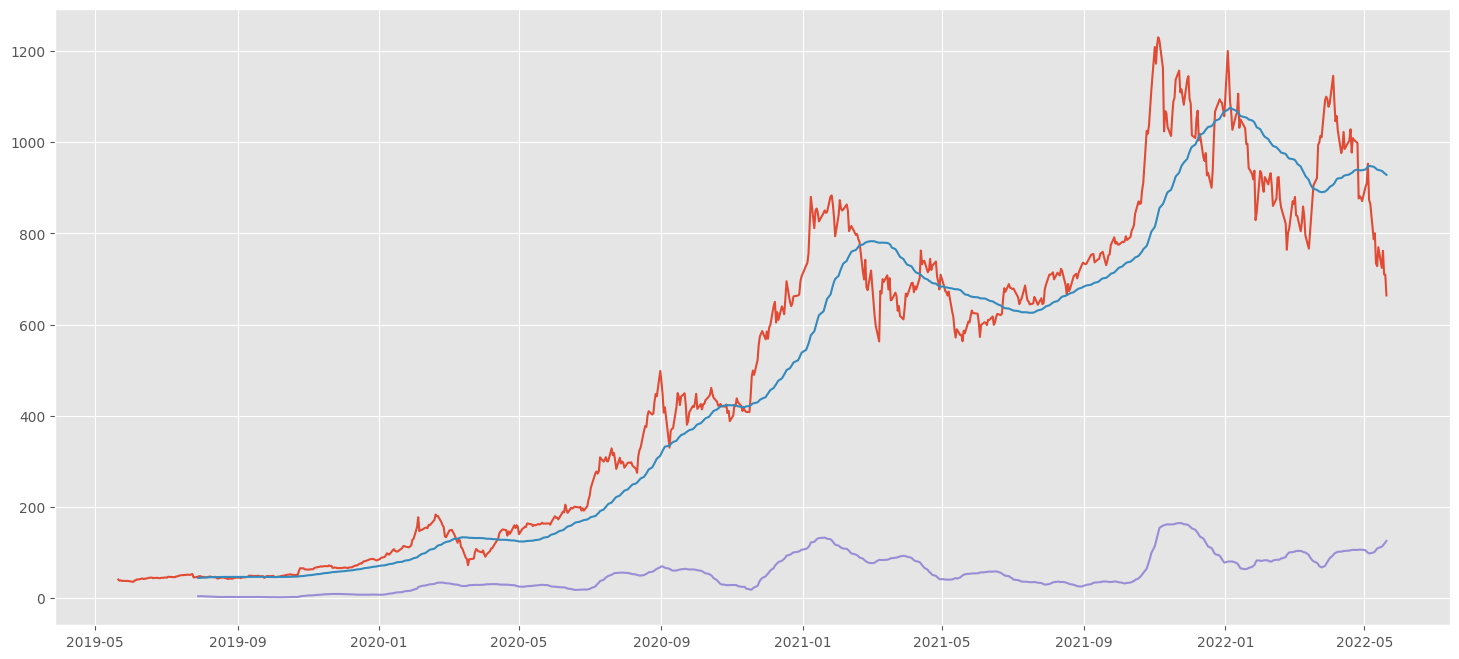

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [ ]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [ ]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


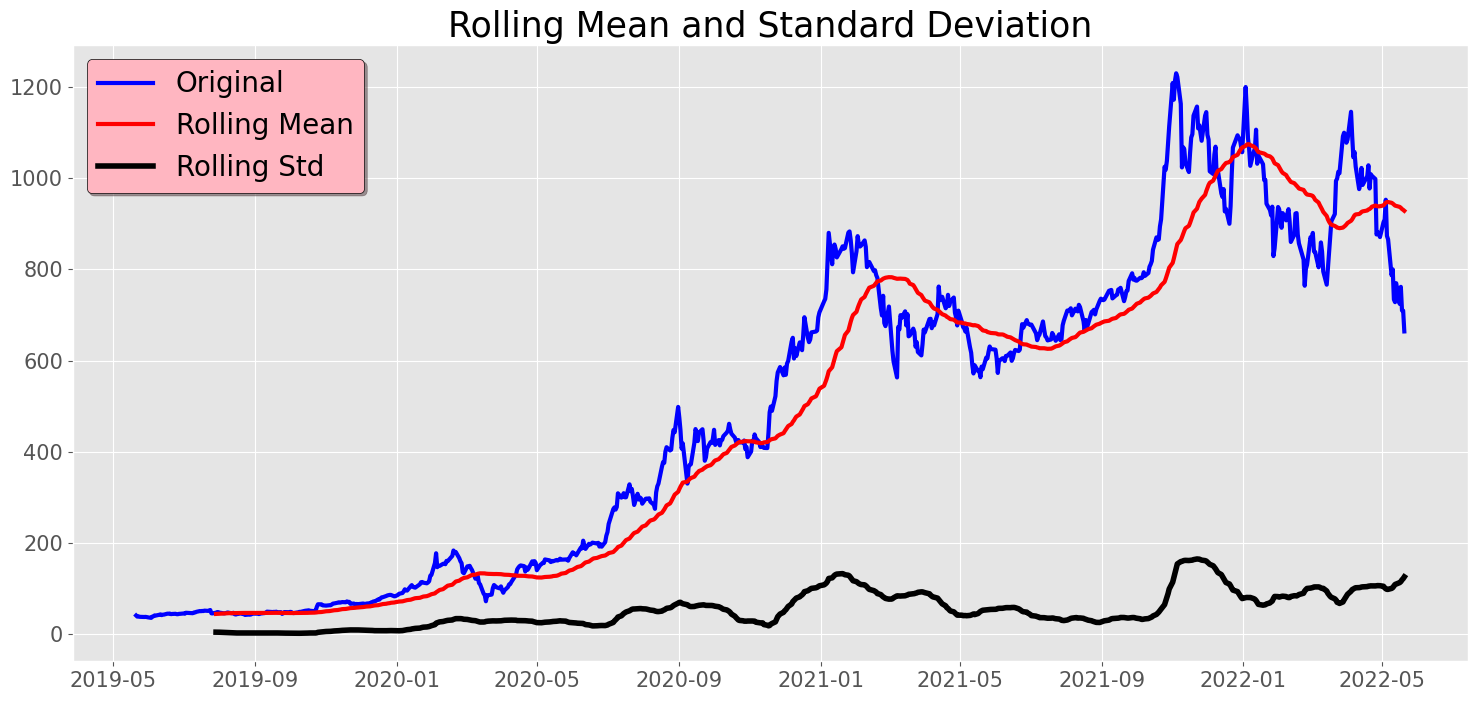

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [ ]:
test_stationarity(stock_data.Close)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [ ]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

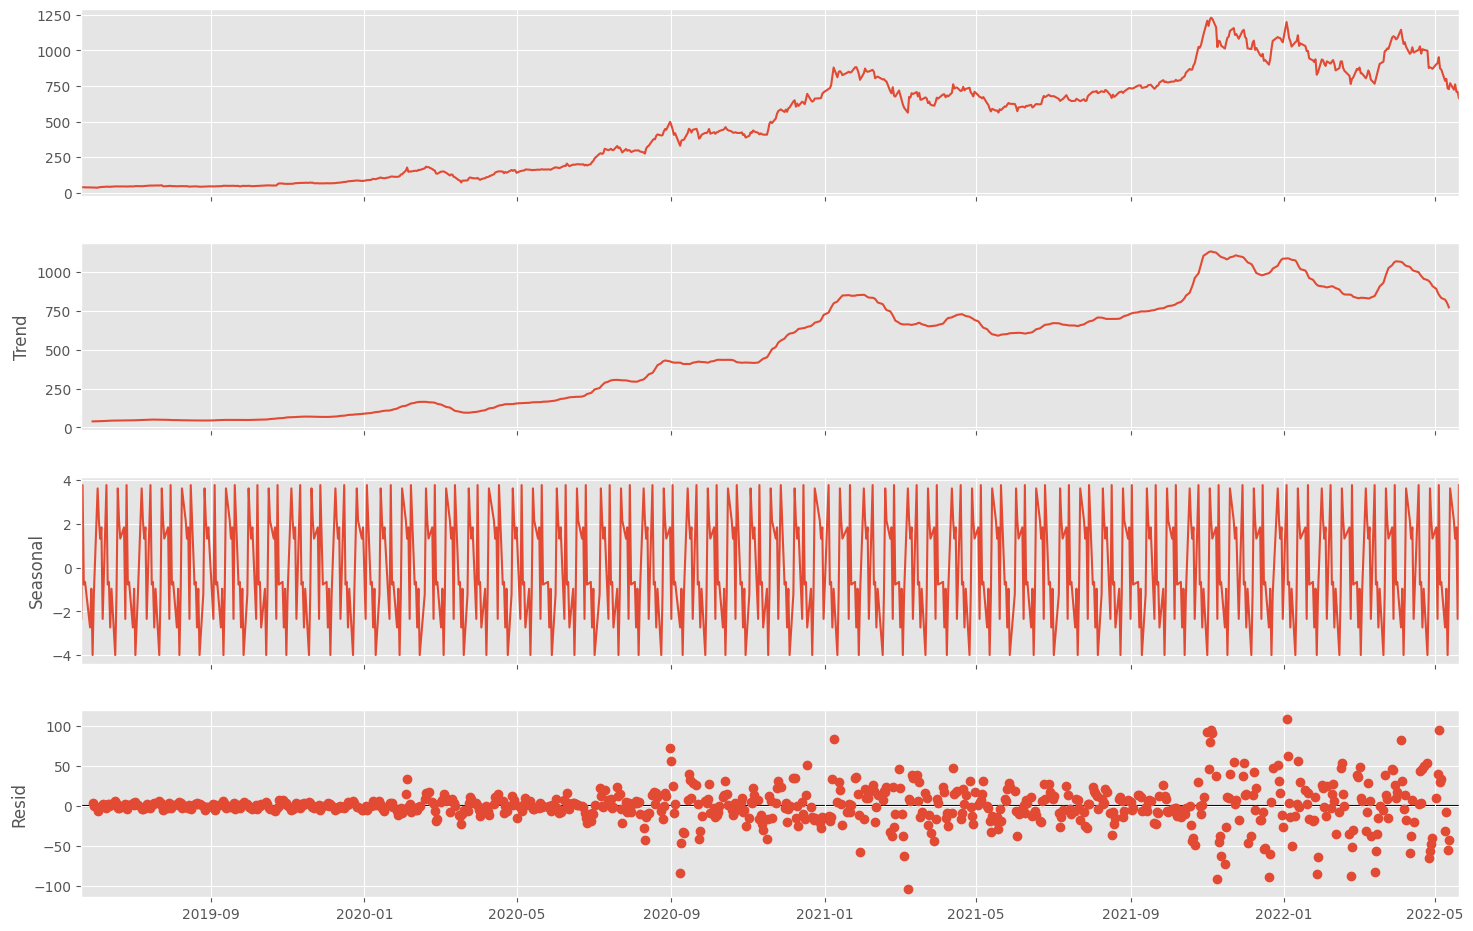

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

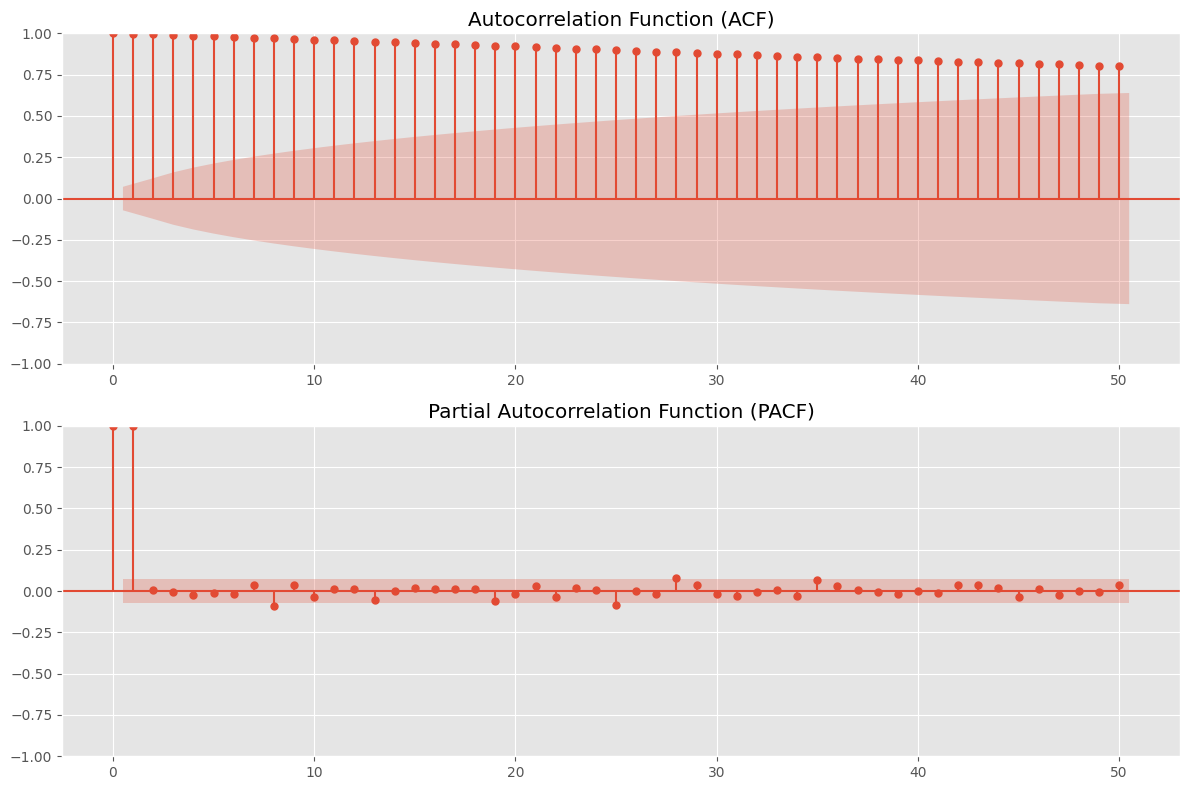

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(stock_data.Close, ax=ax[0], lags=50)
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(stock_data.Close, ax=ax[1], lags=50)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


<Axes: ylabel='Close'>

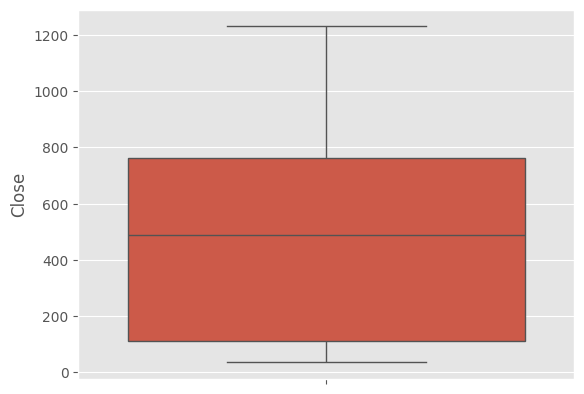

In [ ]:
import seaborn as sns
sns.boxplot(stock_data.Close)

In [ ]:
train_data=stock_data.Close[:int(len(stock_data)*0.6)]
test_data=stock_data.Close[int(len(stock_data)*0.6):]


# Model Building

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
history=[x for x in train_data]

In [ ]:
model=ARIMA(history,order=(1,1,1))

In [ ]:
test_data

Date
2021-03-10    668.059998
2021-03-11    699.599976
2021-03-12    693.729980
2021-03-15    707.940002
2021-03-16    676.880005
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 304, dtype: float64

In [ ]:
model=model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  454
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1909.204
Date:                Tue, 18 Jun 2024   AIC                           3824.408
Time:                        07:05:41   BIC                           3836.756
Sample:                             0   HQIC                          3829.274
                                - 454                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8946      0.158     -5.674      0.000      -1.204      -0.586
ma.L1          0.9151      0.145      6.323      0.000       0.631       1.199
sigma2       268.0639      7.859     34.110      0.000     252.661     283.467
===================================================================================
Ljung-Box (L1) (Q):                   1.81   Jarque-Bera (JB):              1602.57
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):             267.30   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast()[0]

676.6292275364334

In [ ]:
test_data[0]

668.0599975585938

In [ ]:
mean_squared_error([test_data[0]],model.forecast())

73.43170241310581

In [ ]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

8.569229977839655

In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE of ARIMA Model: 32.31682845118918


In [ ]:
fc_series = pd.Series(predictions, index=test_data.index)

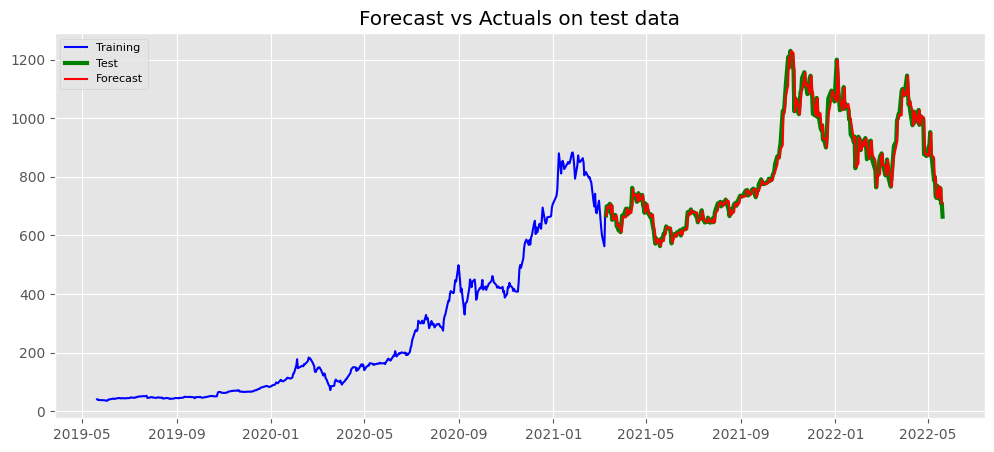

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))
print( "mean_squared_error:",mean_squared_error(test_data, predictions))
print("mean_absolute_error:",mean_absolute_error(test_data, predictions))
print("accuracy:",r2_score(test_data, predictions))

RMSE of ARIMA Model: 32.31682845118918
mean_squared_error: 1044.3774011435905
mean_absolute_error: 22.655507821372805
accuracy: 0.9642580584009386
